In [1]:
import numpy as np
import scipy.stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_pickle('../data/cleaned_train.pkl')
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
discrete_feature = data.select_dtypes(include='int64')
discrete_feature

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


In [4]:
# sample space
pd.unique(discrete_feature['OverallQual'])

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [5]:
pk = data.groupby(by='OverallQual')['OverallQual'].count()/data.shape[0]
xk = pk.index

In [6]:
# probability mass function
rv = ss.rv_discrete(values=(xk,pk))
rv

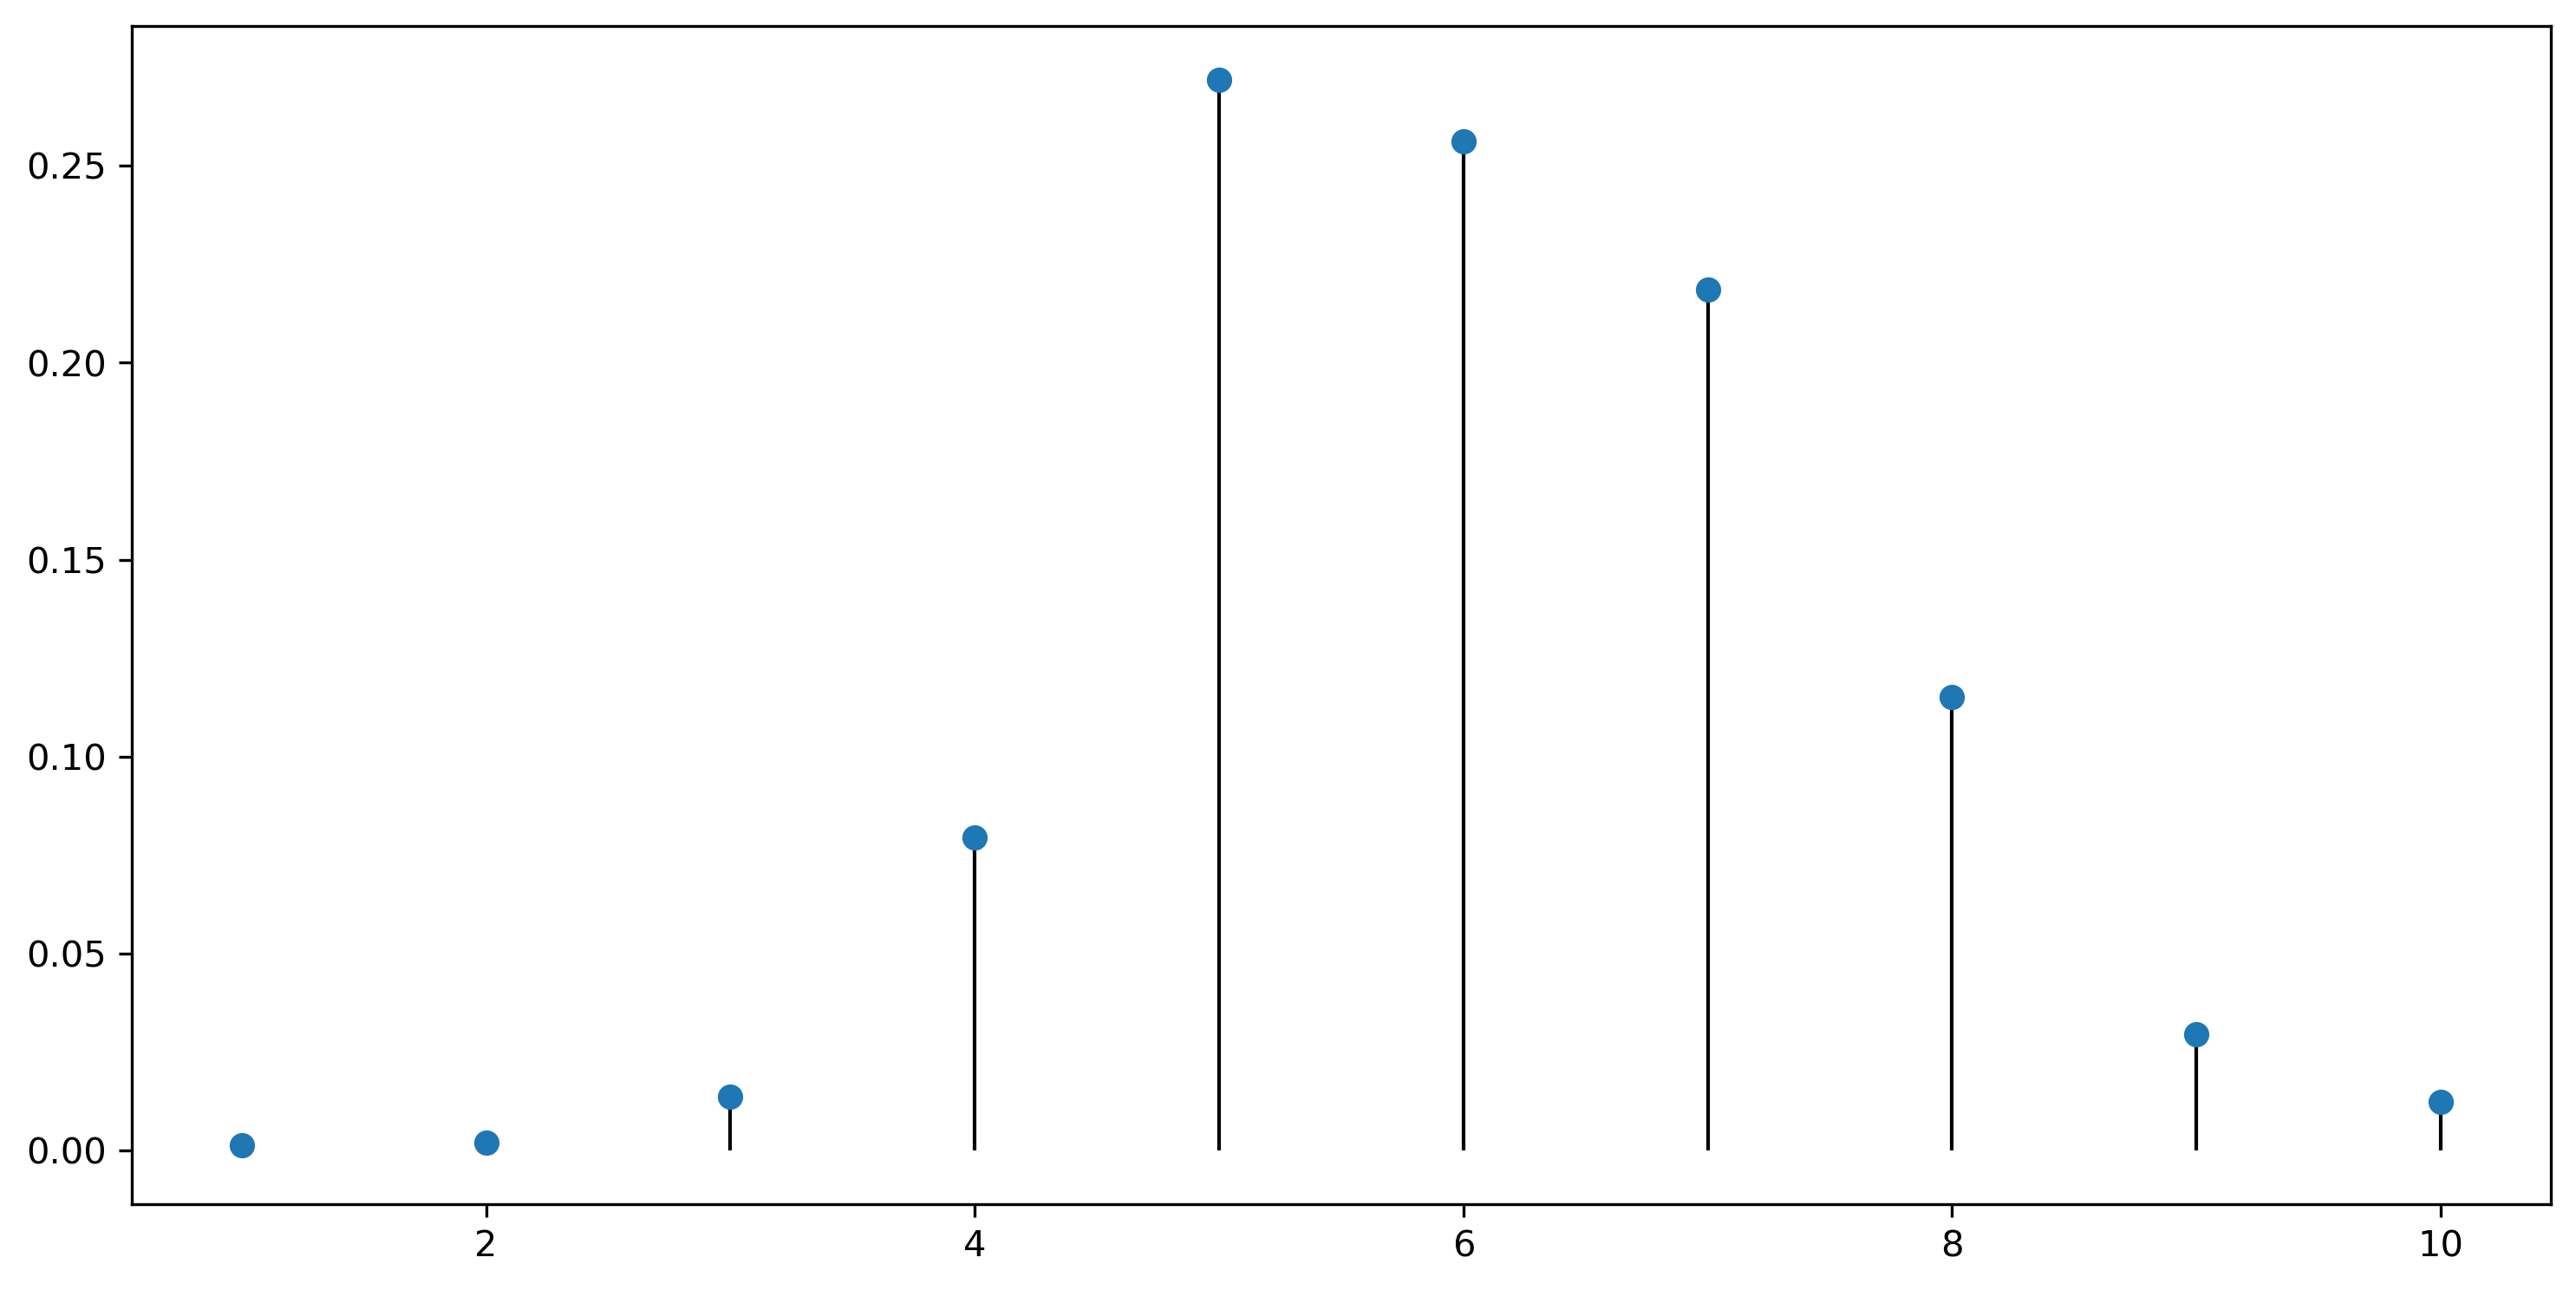

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[12,6],dpi=300)
ax.plot(xk, rv.pmf(xk),'o')
ax.vlines(xk,0,rv.pmf(xk),lw=1)
plt.show()

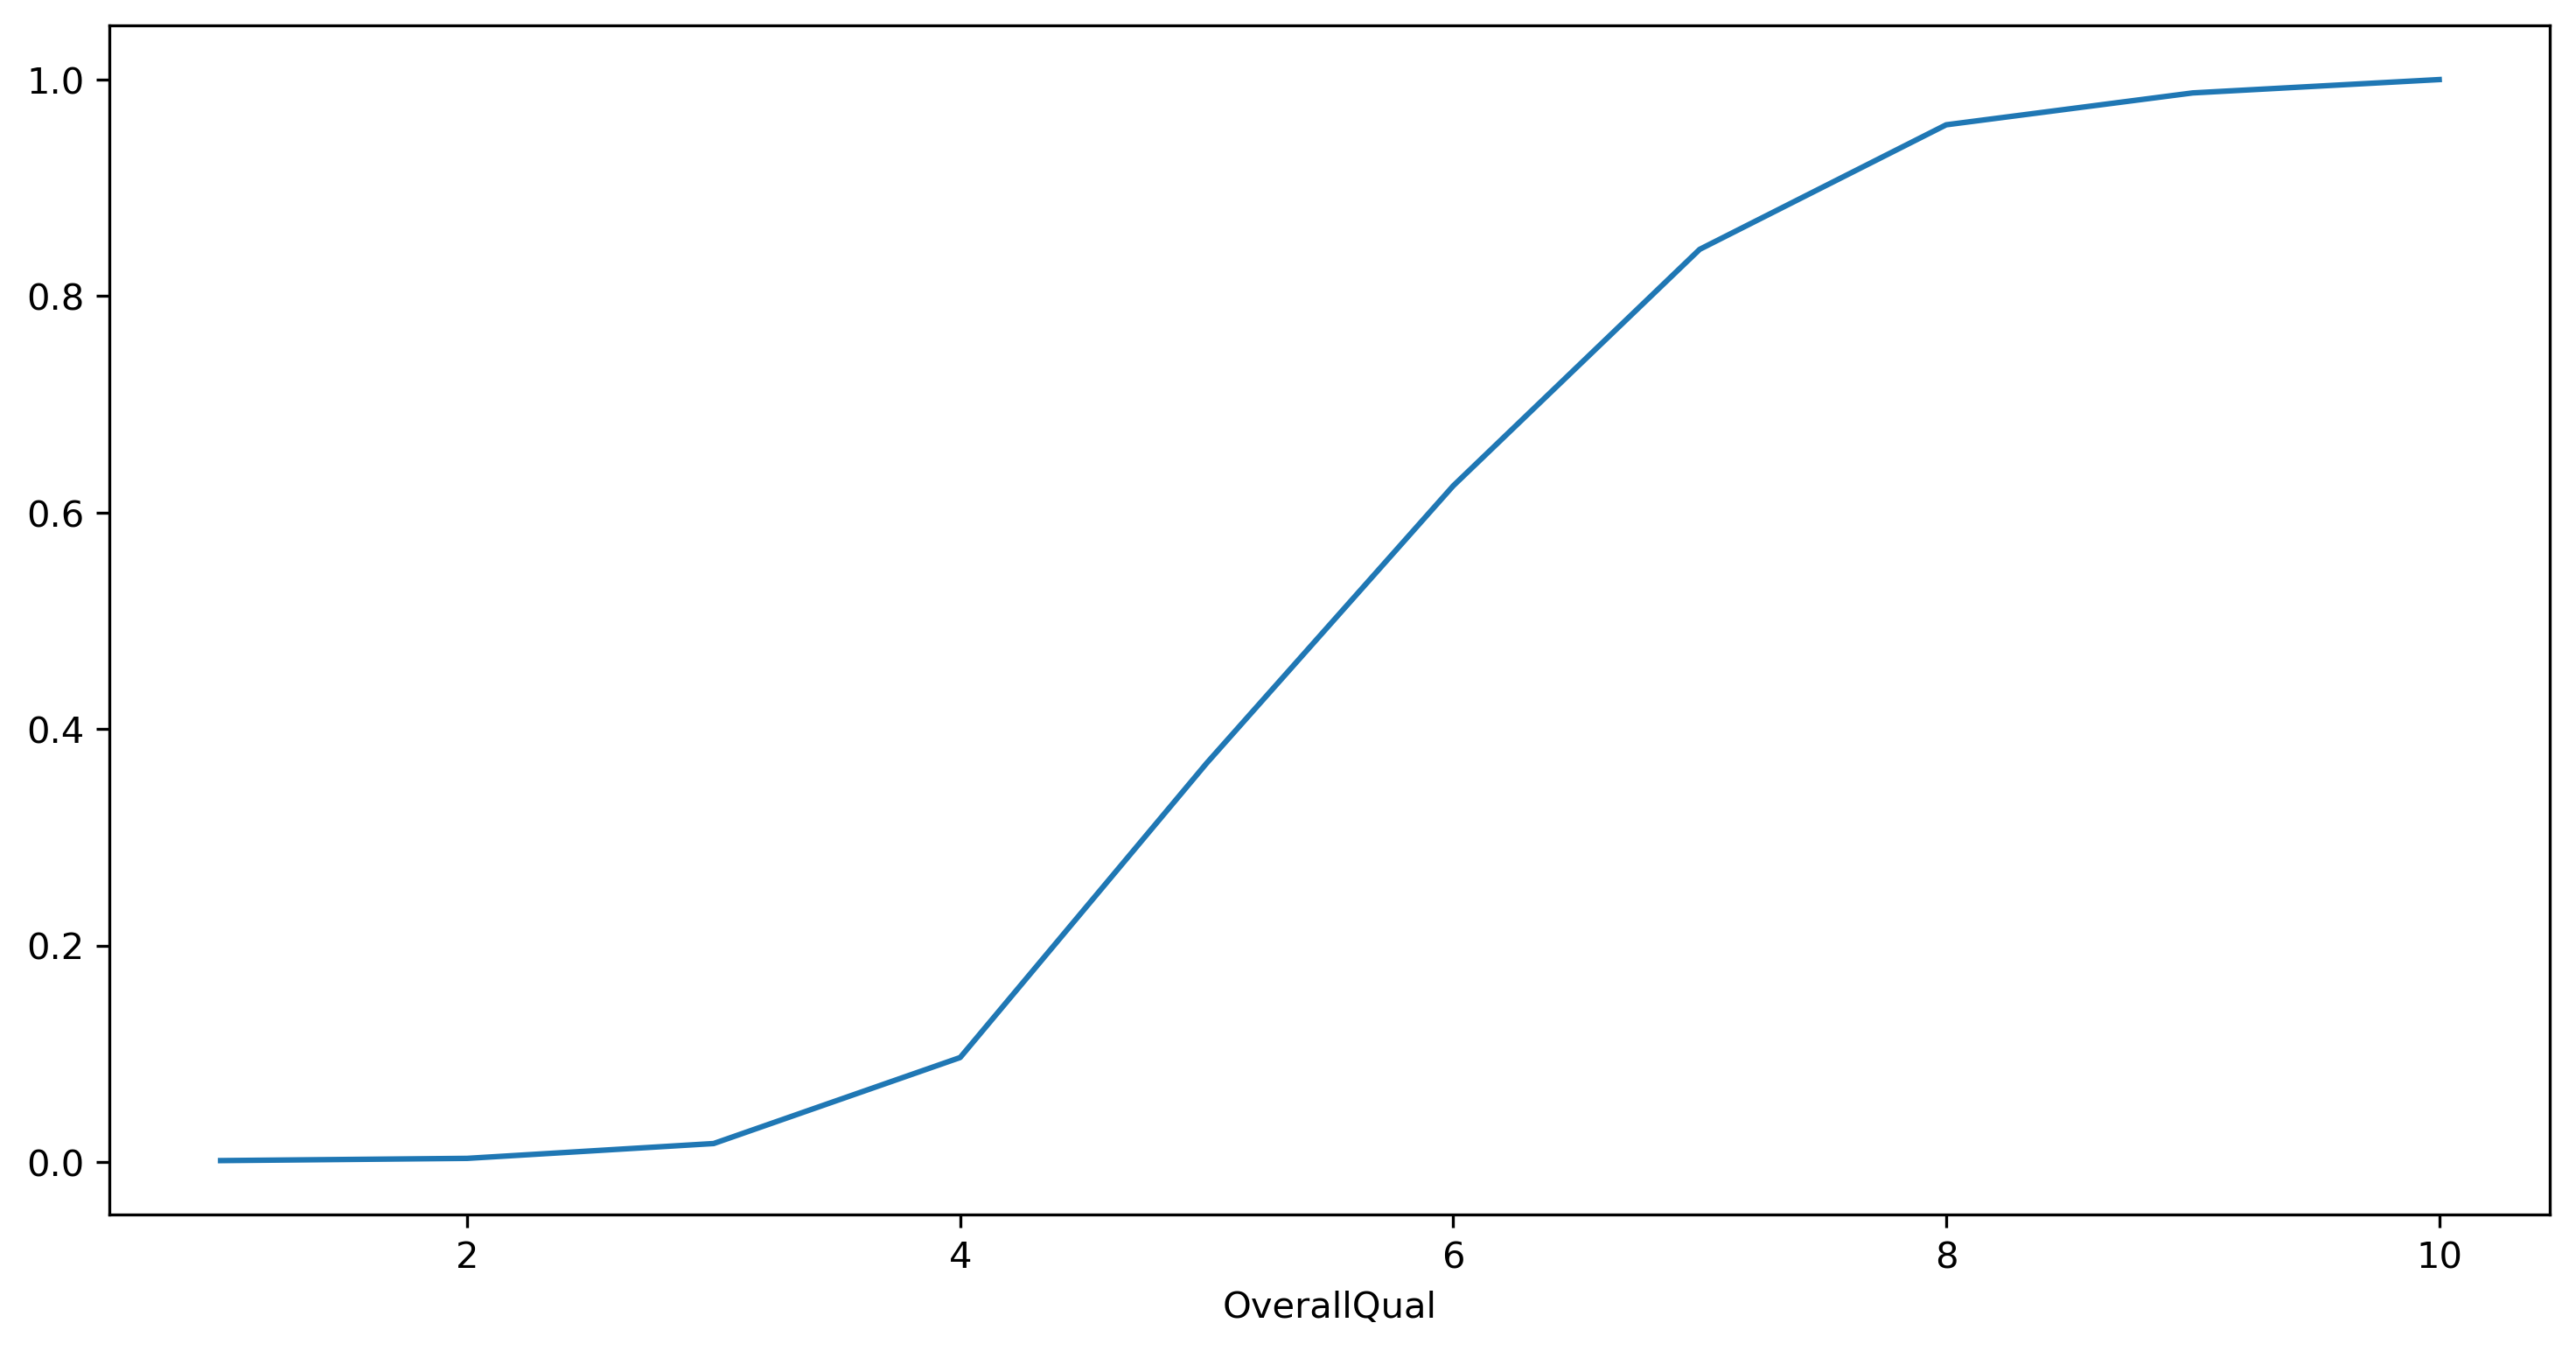

In [8]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=xk, y=rv.cdf(xk))
plt.show()

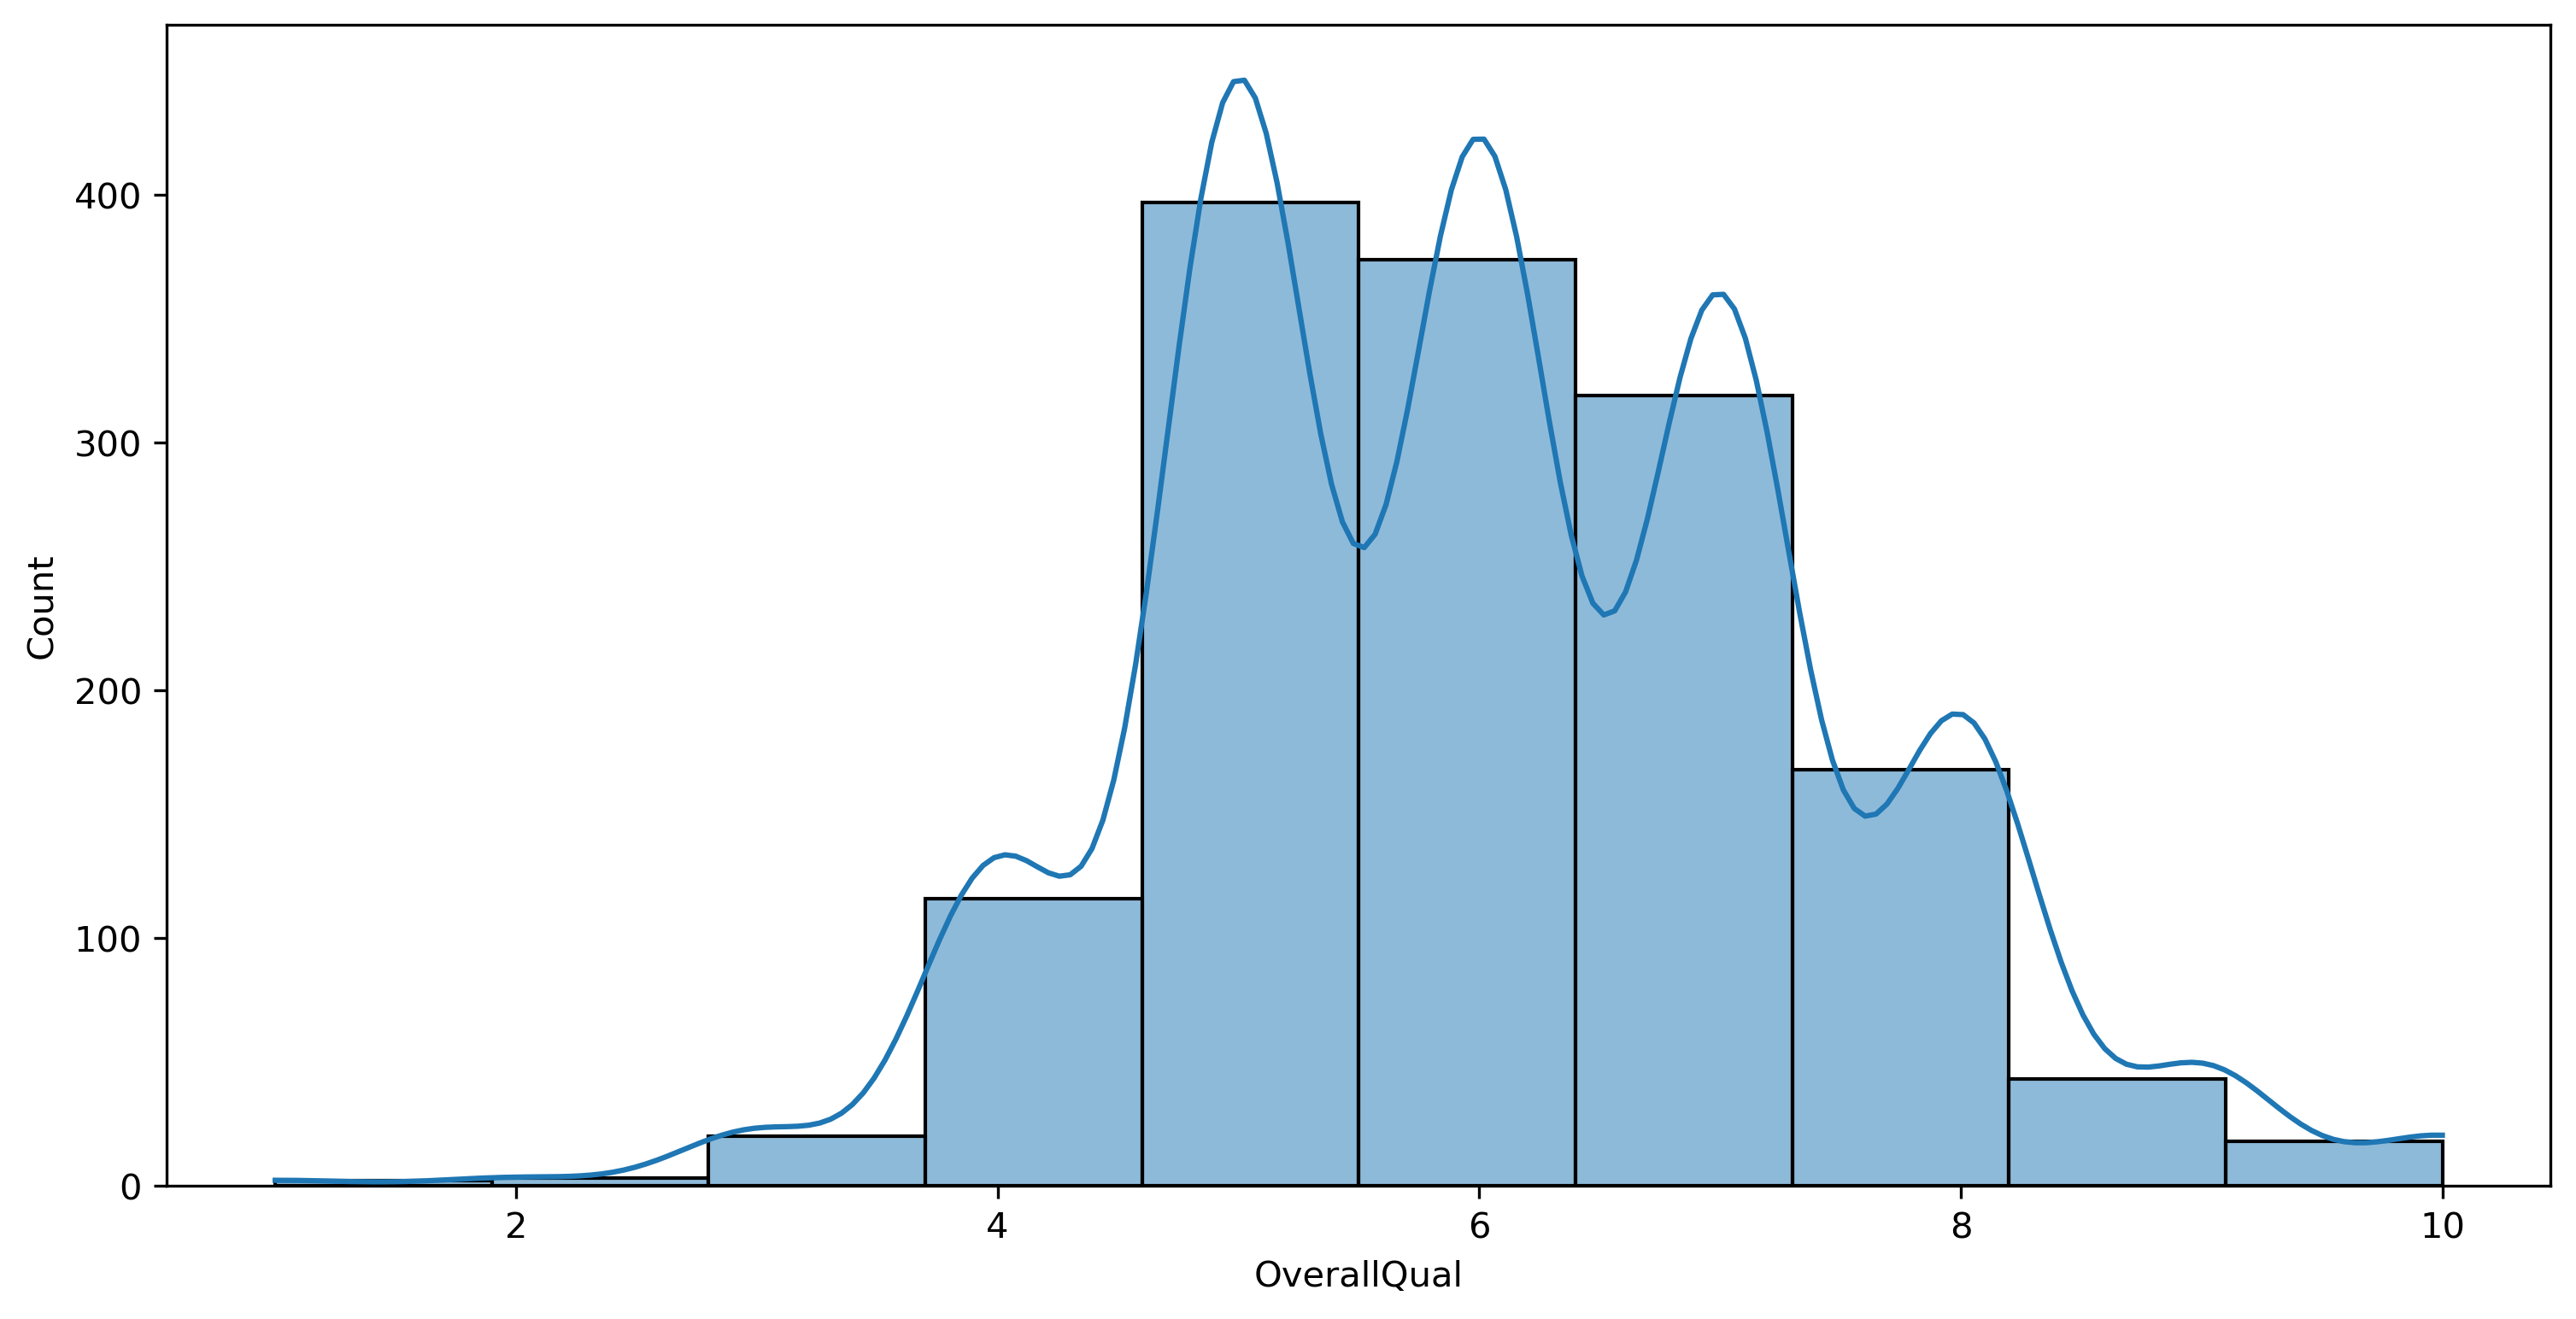

In [9]:
# plot data in histogram
plt.figure(figsize=[12,6],dpi=300)
sns.histplot(data=data.OverallQual,bins=10,kde=True)
plt.show()

In [10]:
data.CentralAir = data.CentralAir.apply(lambda x: 1 if x=='Y' else 0)

In [11]:
sample1 = data[['CentralAir']].sample(100,random_state=36)
sample2 = data[['CentralAir']].sample(100,random_state=42)
sample3 = data[['CentralAir']].sample(100,random_state=52)
sample4 = data[['CentralAir']].sample(100,random_state=64)
samples = [sample1,sample2,sample3,sample4]
prob = 0

for i in range(len(samples)):
    prob += samples[i].groupby('CentralAir')['CentralAir'].count()/samples[i].shape[0]

prob = prob/4
prob

CentralAir
0    0.06
1    0.94
Name: CentralAir, dtype: float64

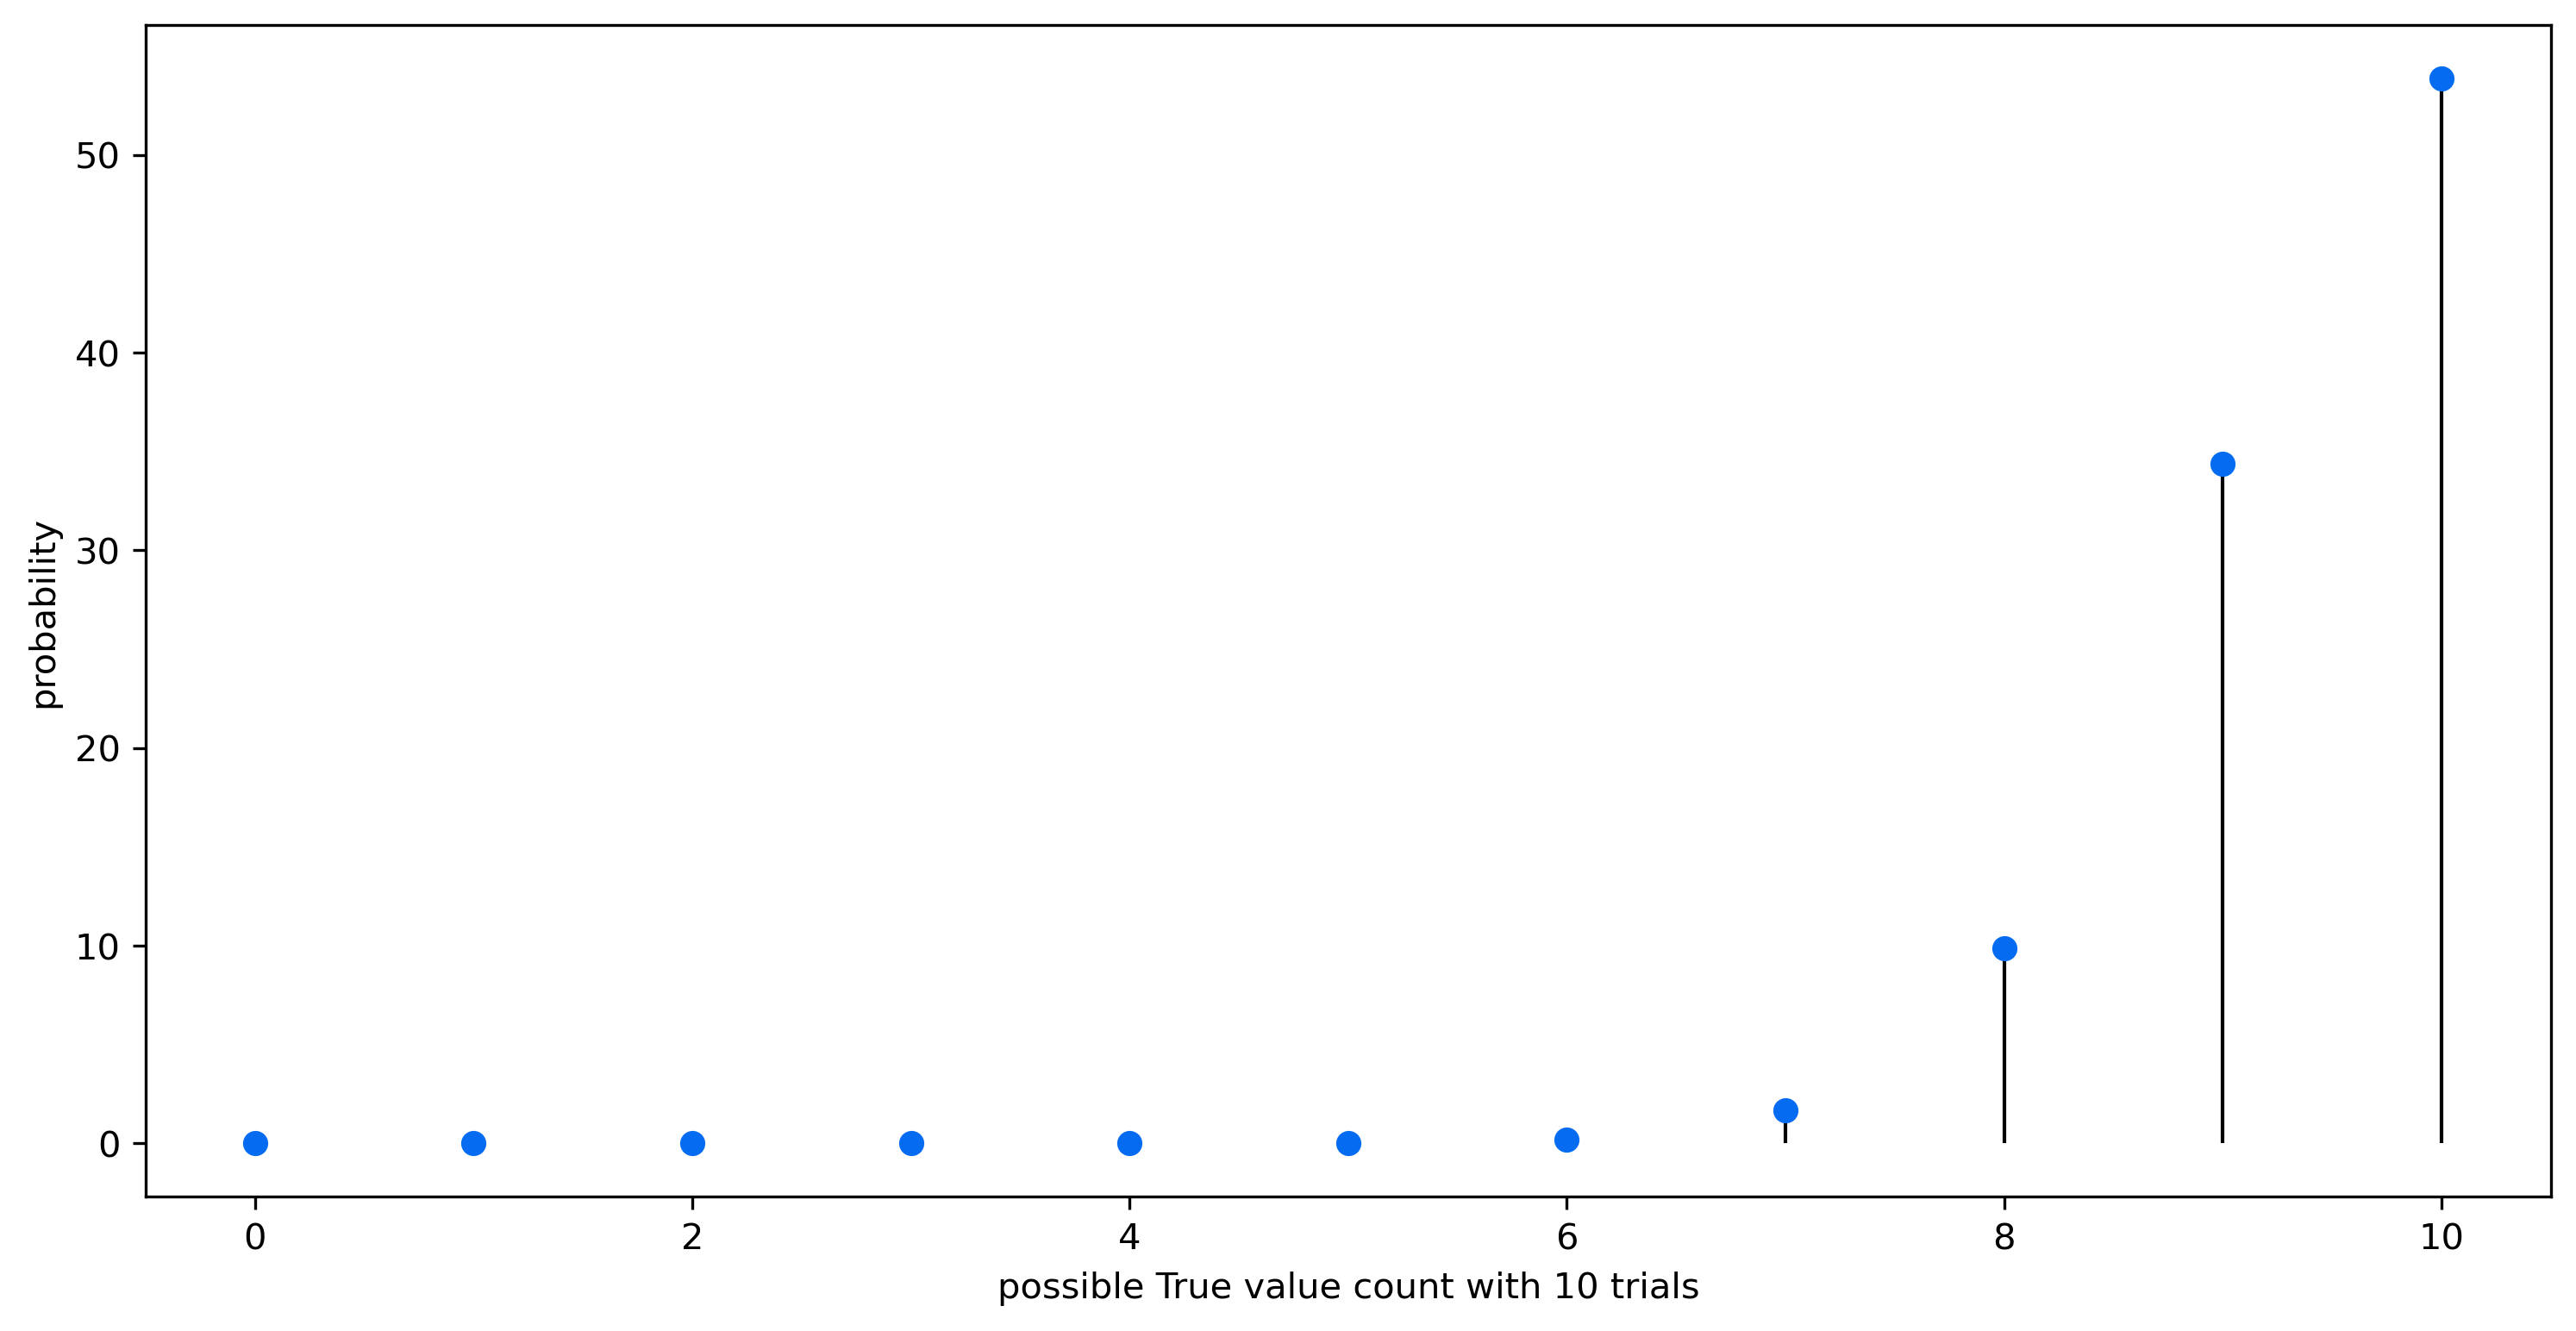

In [12]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[12,6],dpi=300)

for i in range(11):
    y = ss.binom.pmf(n=10,k=i,p=0.94)*100
    ax.plot(i,y,'o',color='#056CF2')
    ax.vlines(i,0,y,lw=1)

plt.xlabel('possible True value count with 10 trials')
plt.ylabel('probability')
plt.show()

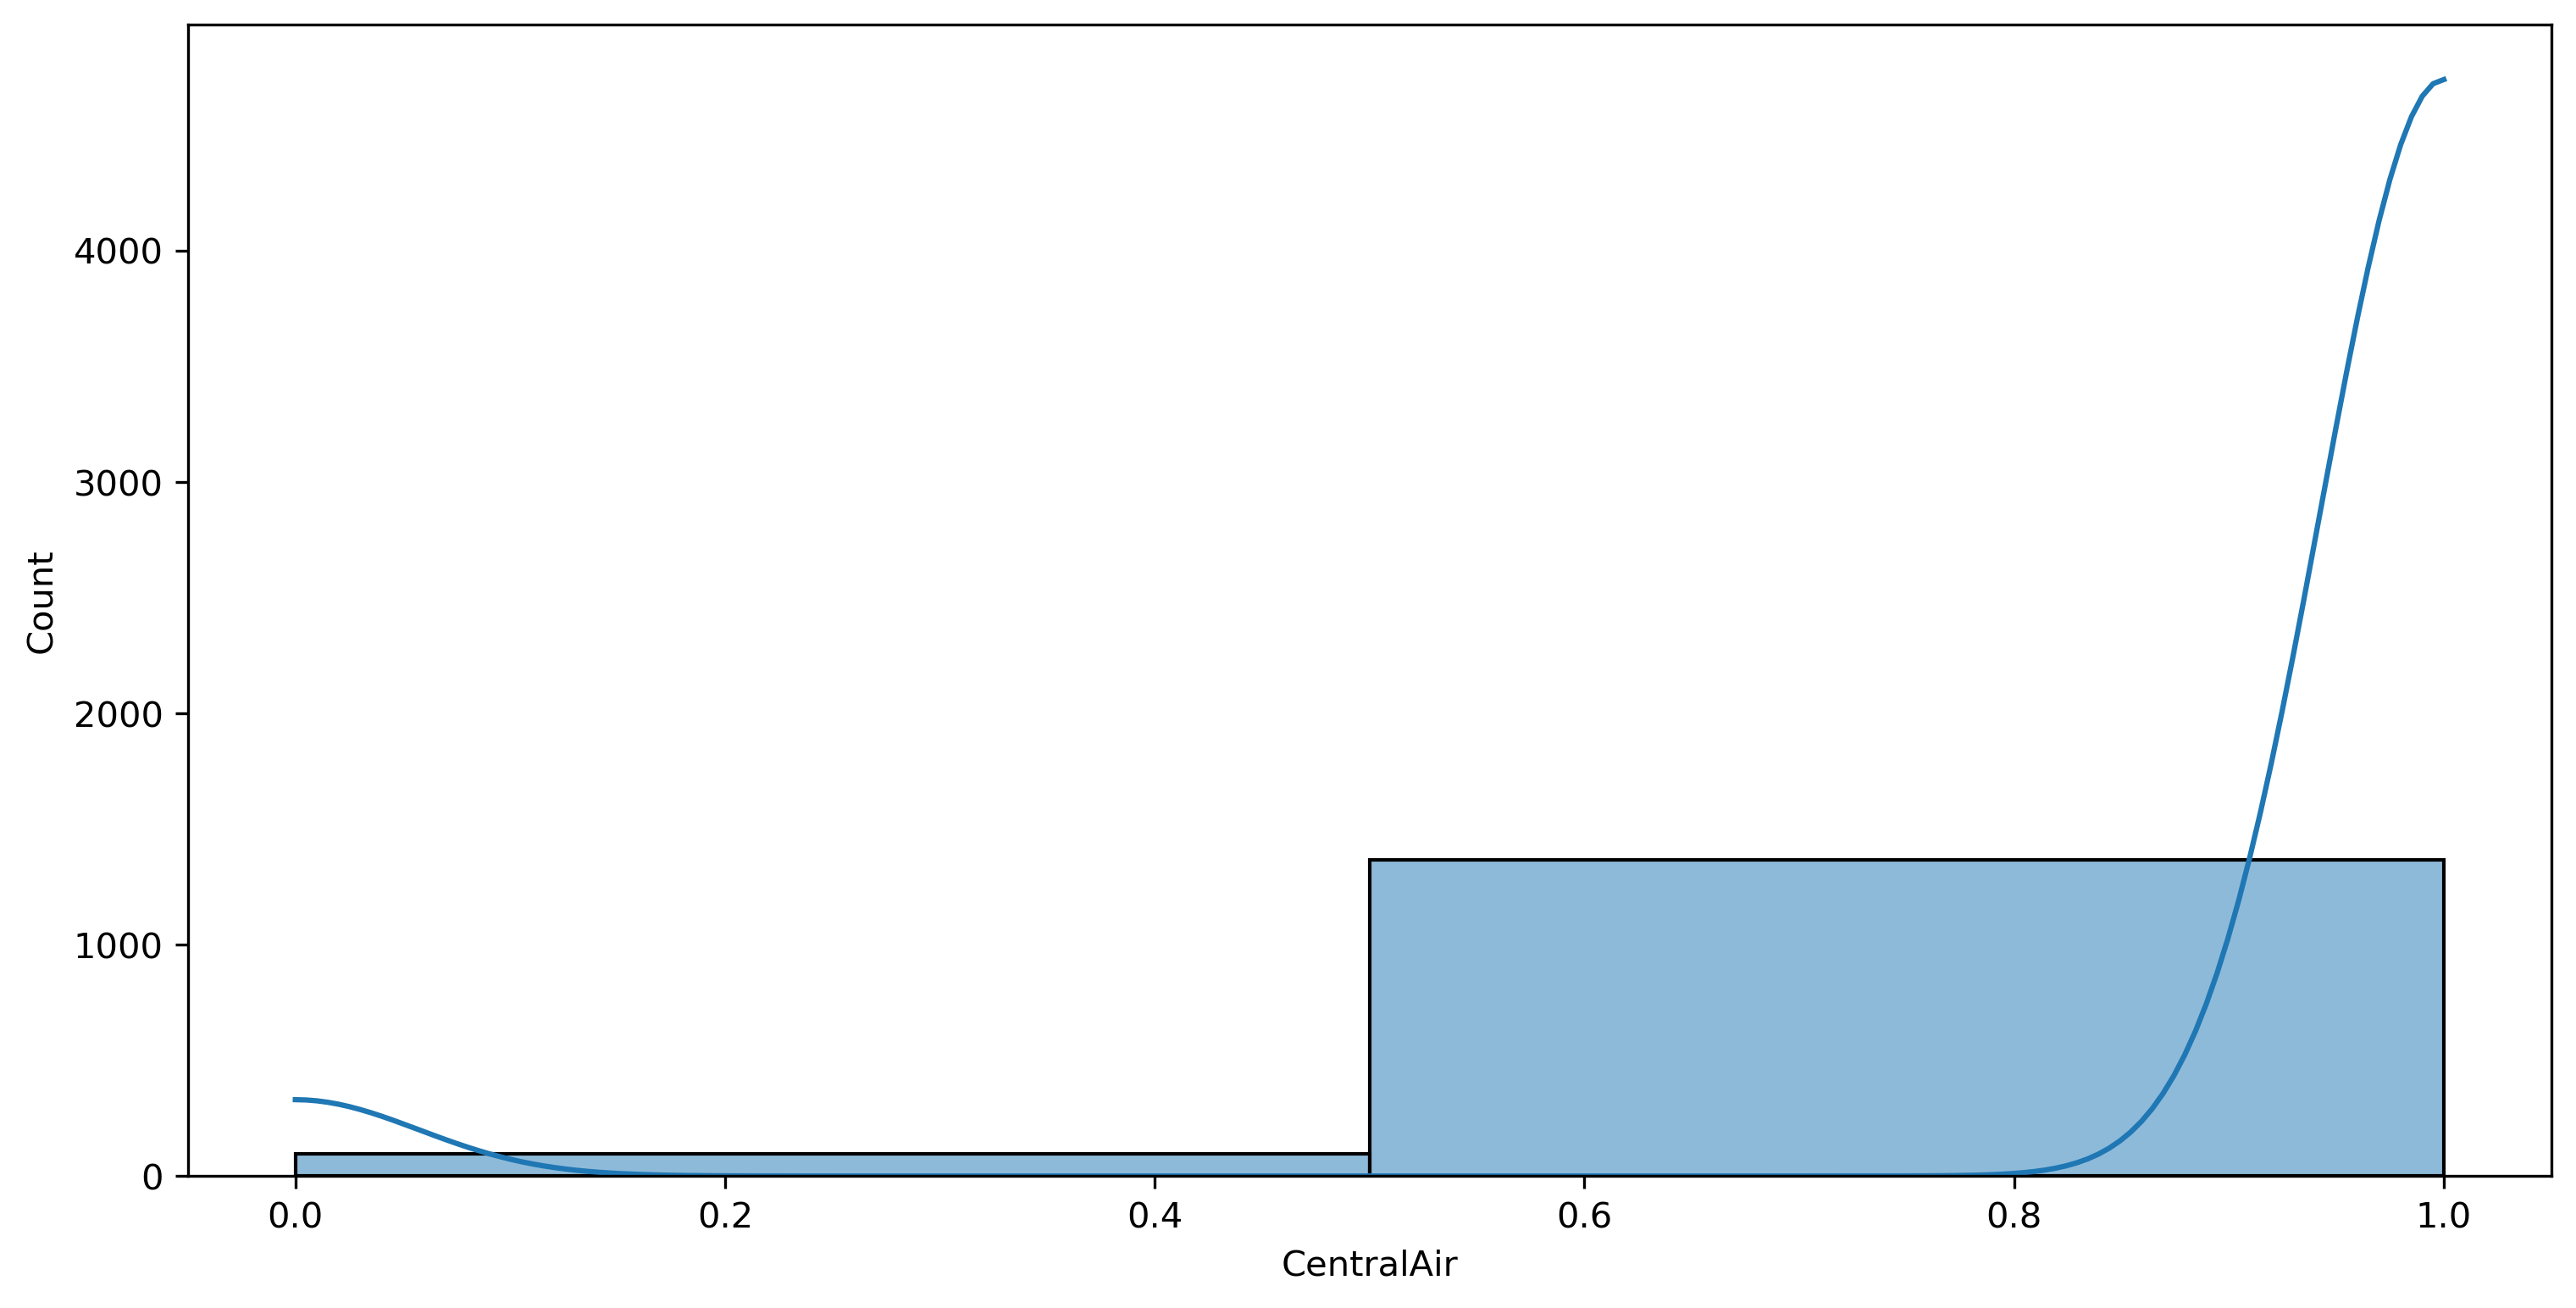

In [13]:
plt.figure(figsize=[12,6],dpi=300)
sns.histplot(data=data.CentralAir,bins=2,kde=True)
plt.show()

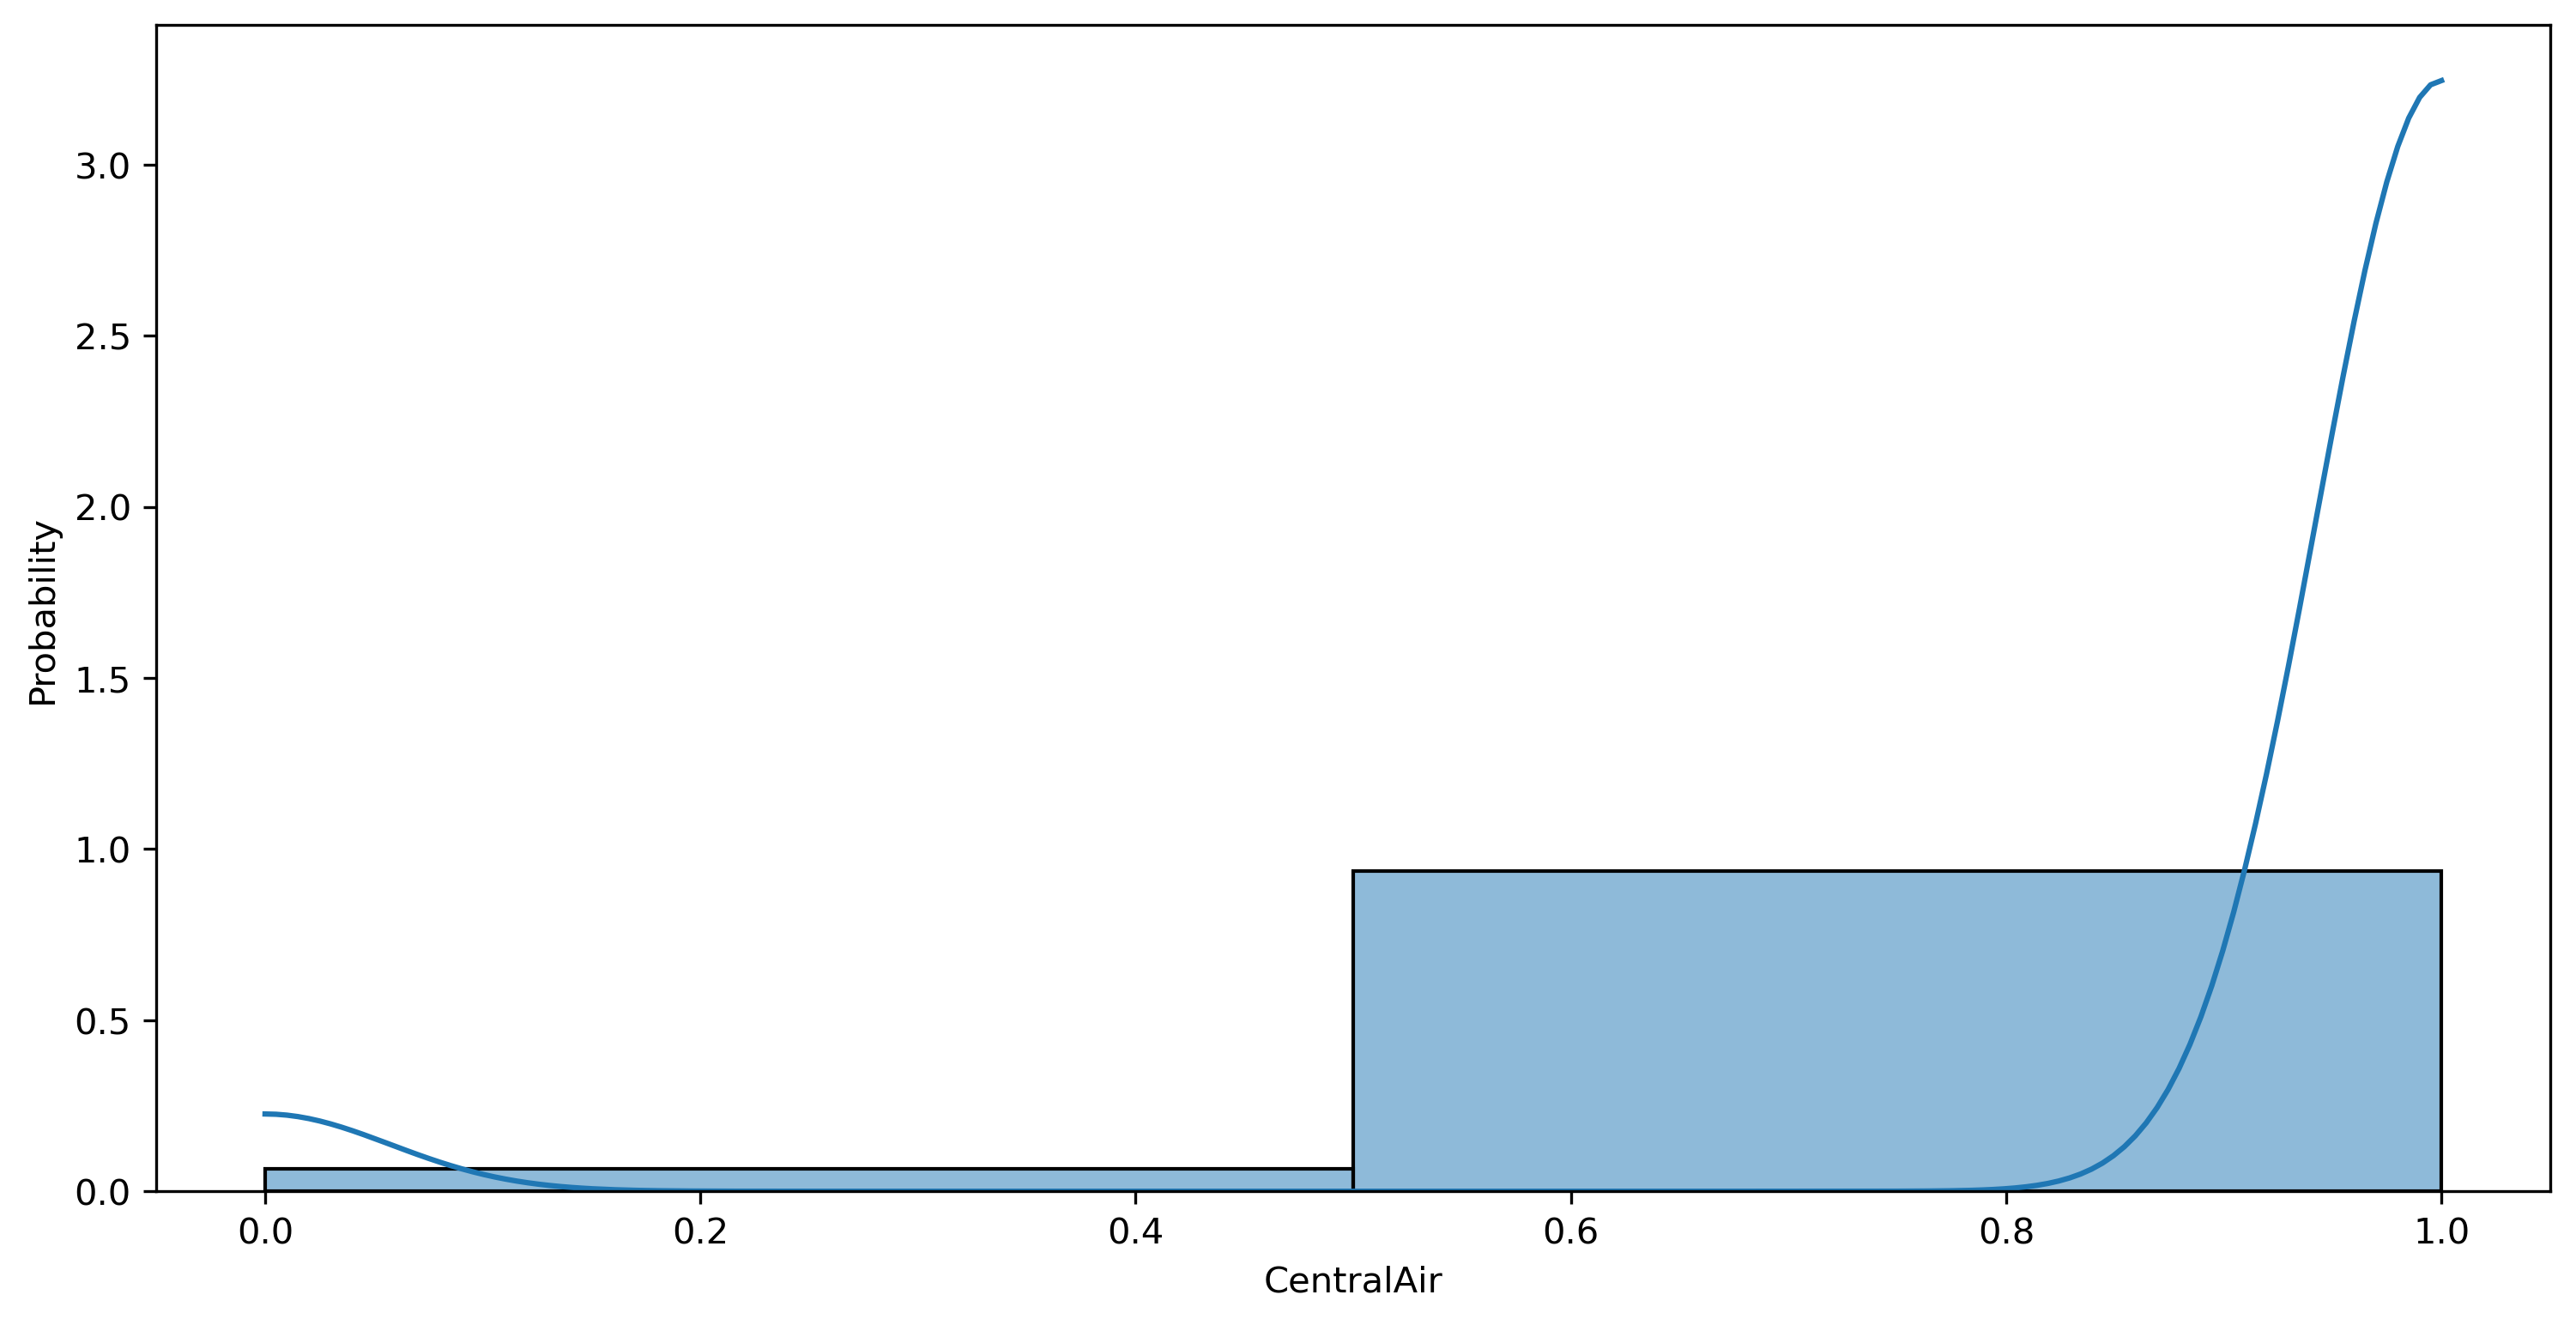

In [14]:
plt.figure(figsize=[12,6],dpi=300)
sns.histplot(data=data.CentralAir,stat='probability',bins=2,kde=True)
plt.show()

In [15]:
ss.binom.pmf(n=10,p=0.1,k=3)

0.05739562800000007

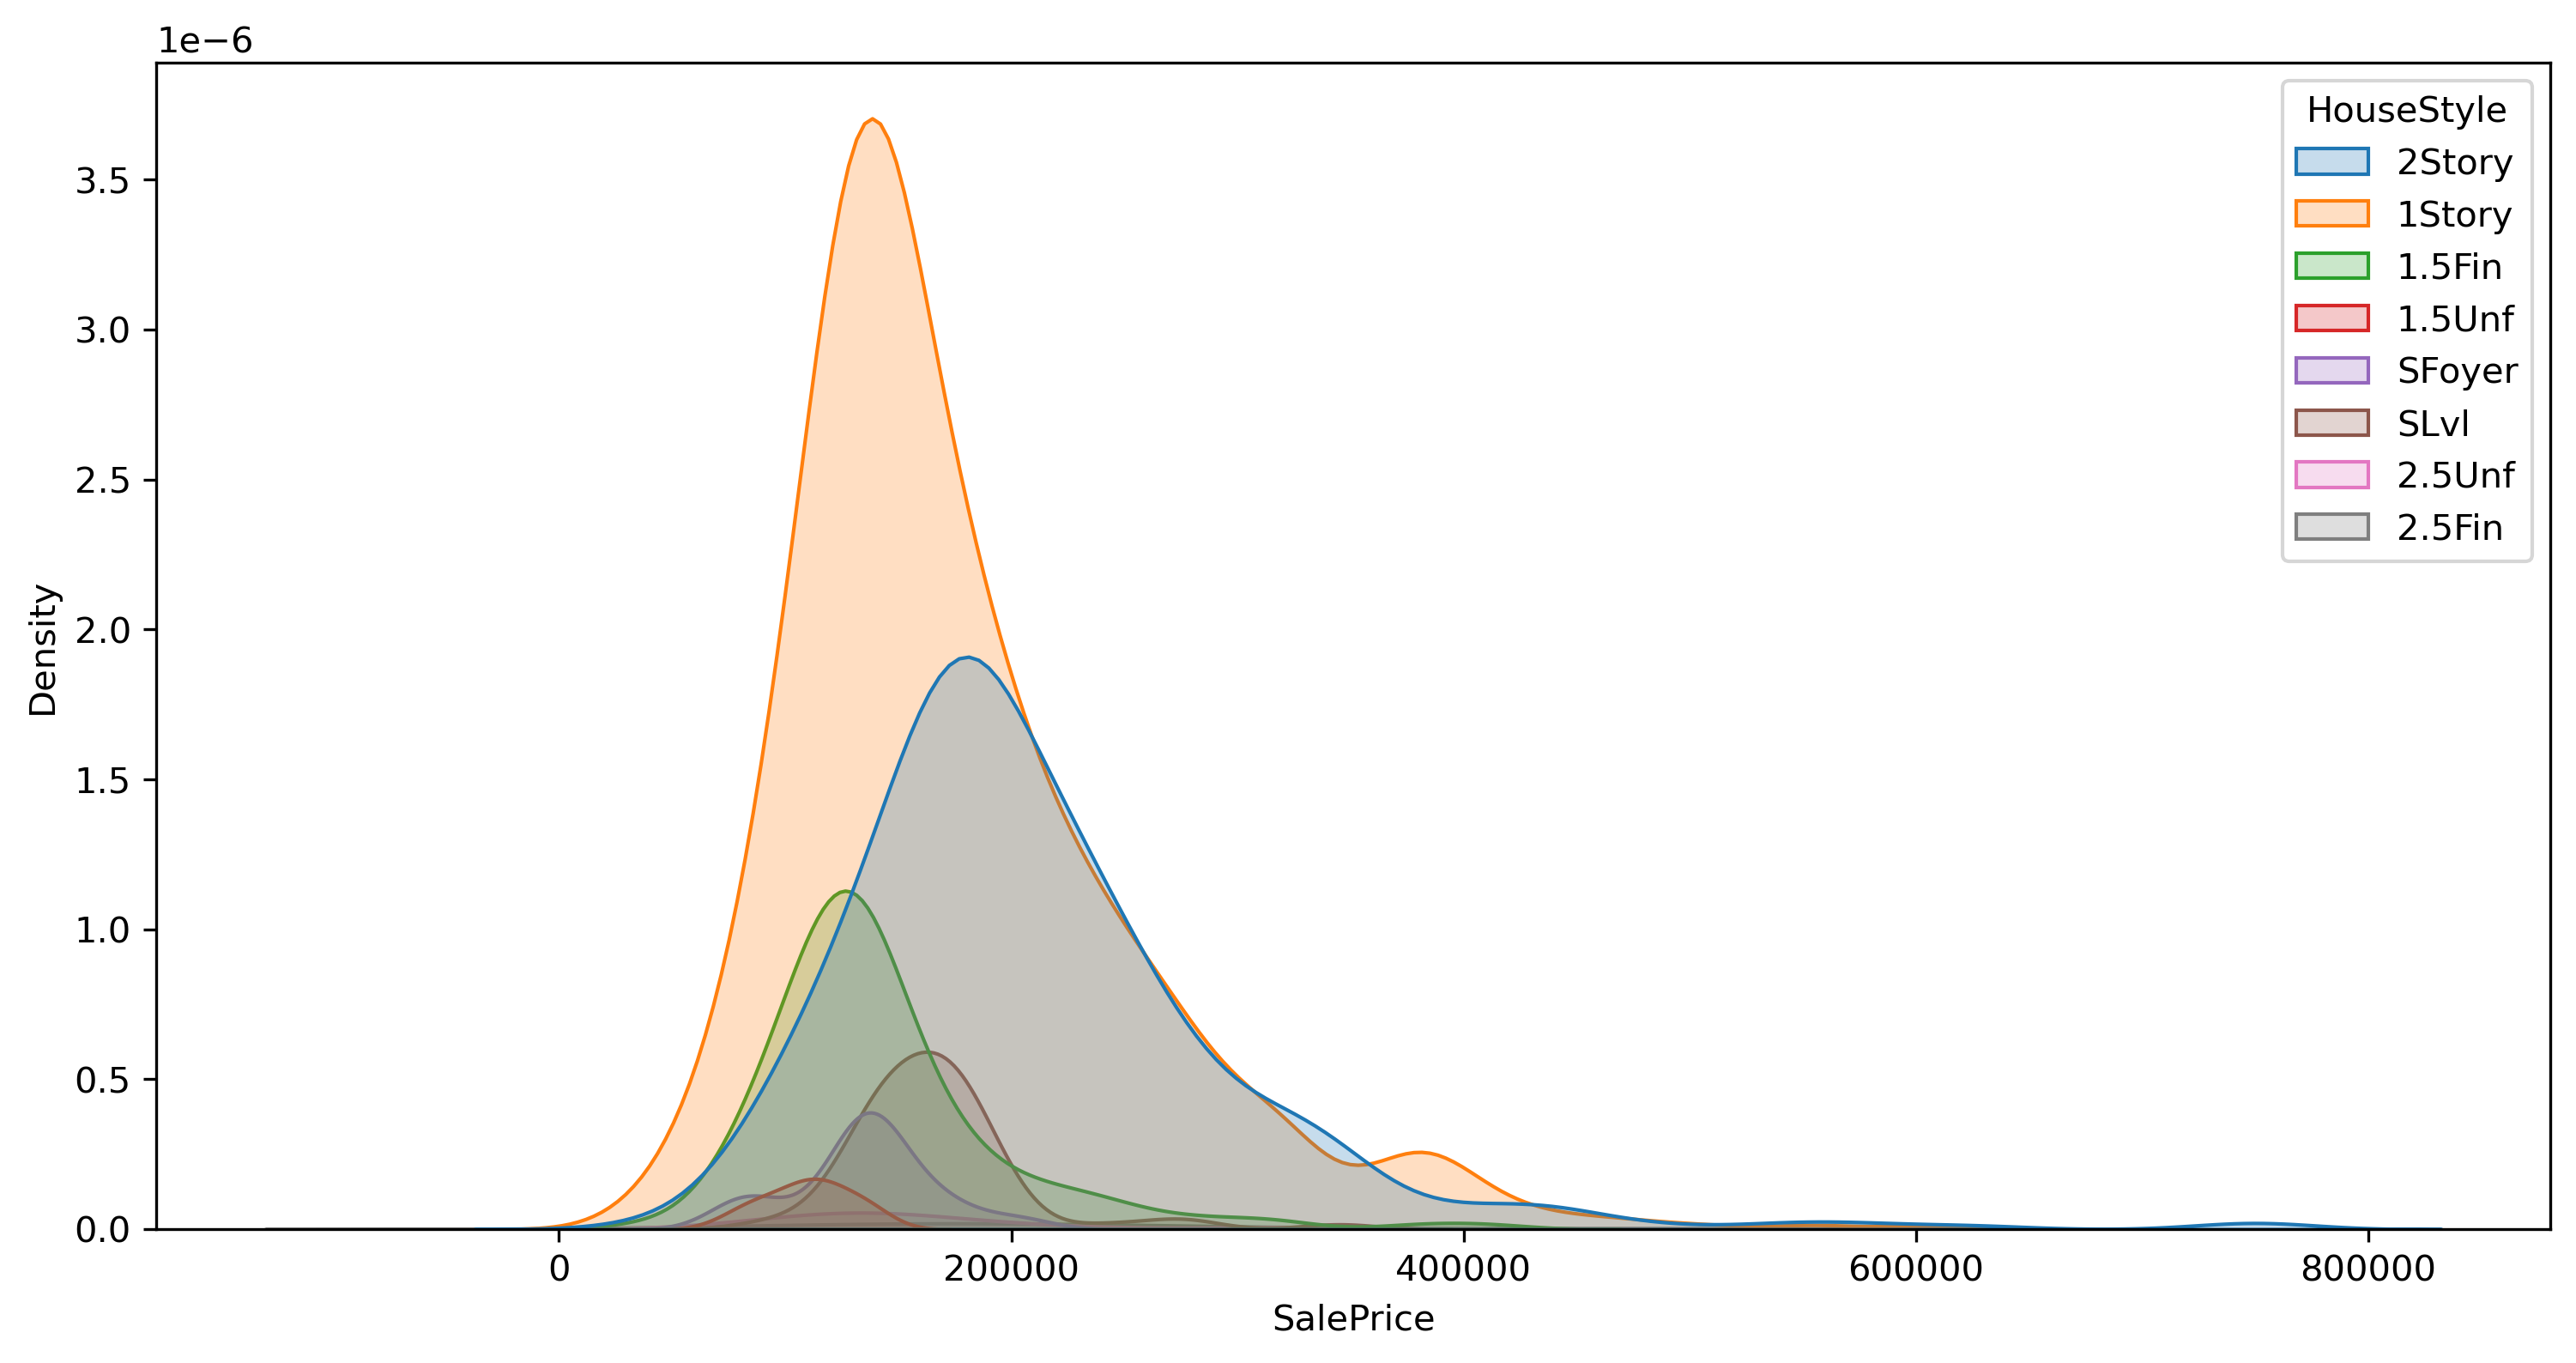

In [26]:
plt.figure(figsize=[12,6],dpi=300)
sns.kdeplot(x=data['SalePrice'],hue=data['HouseStyle'],shade=True)
plt.show()

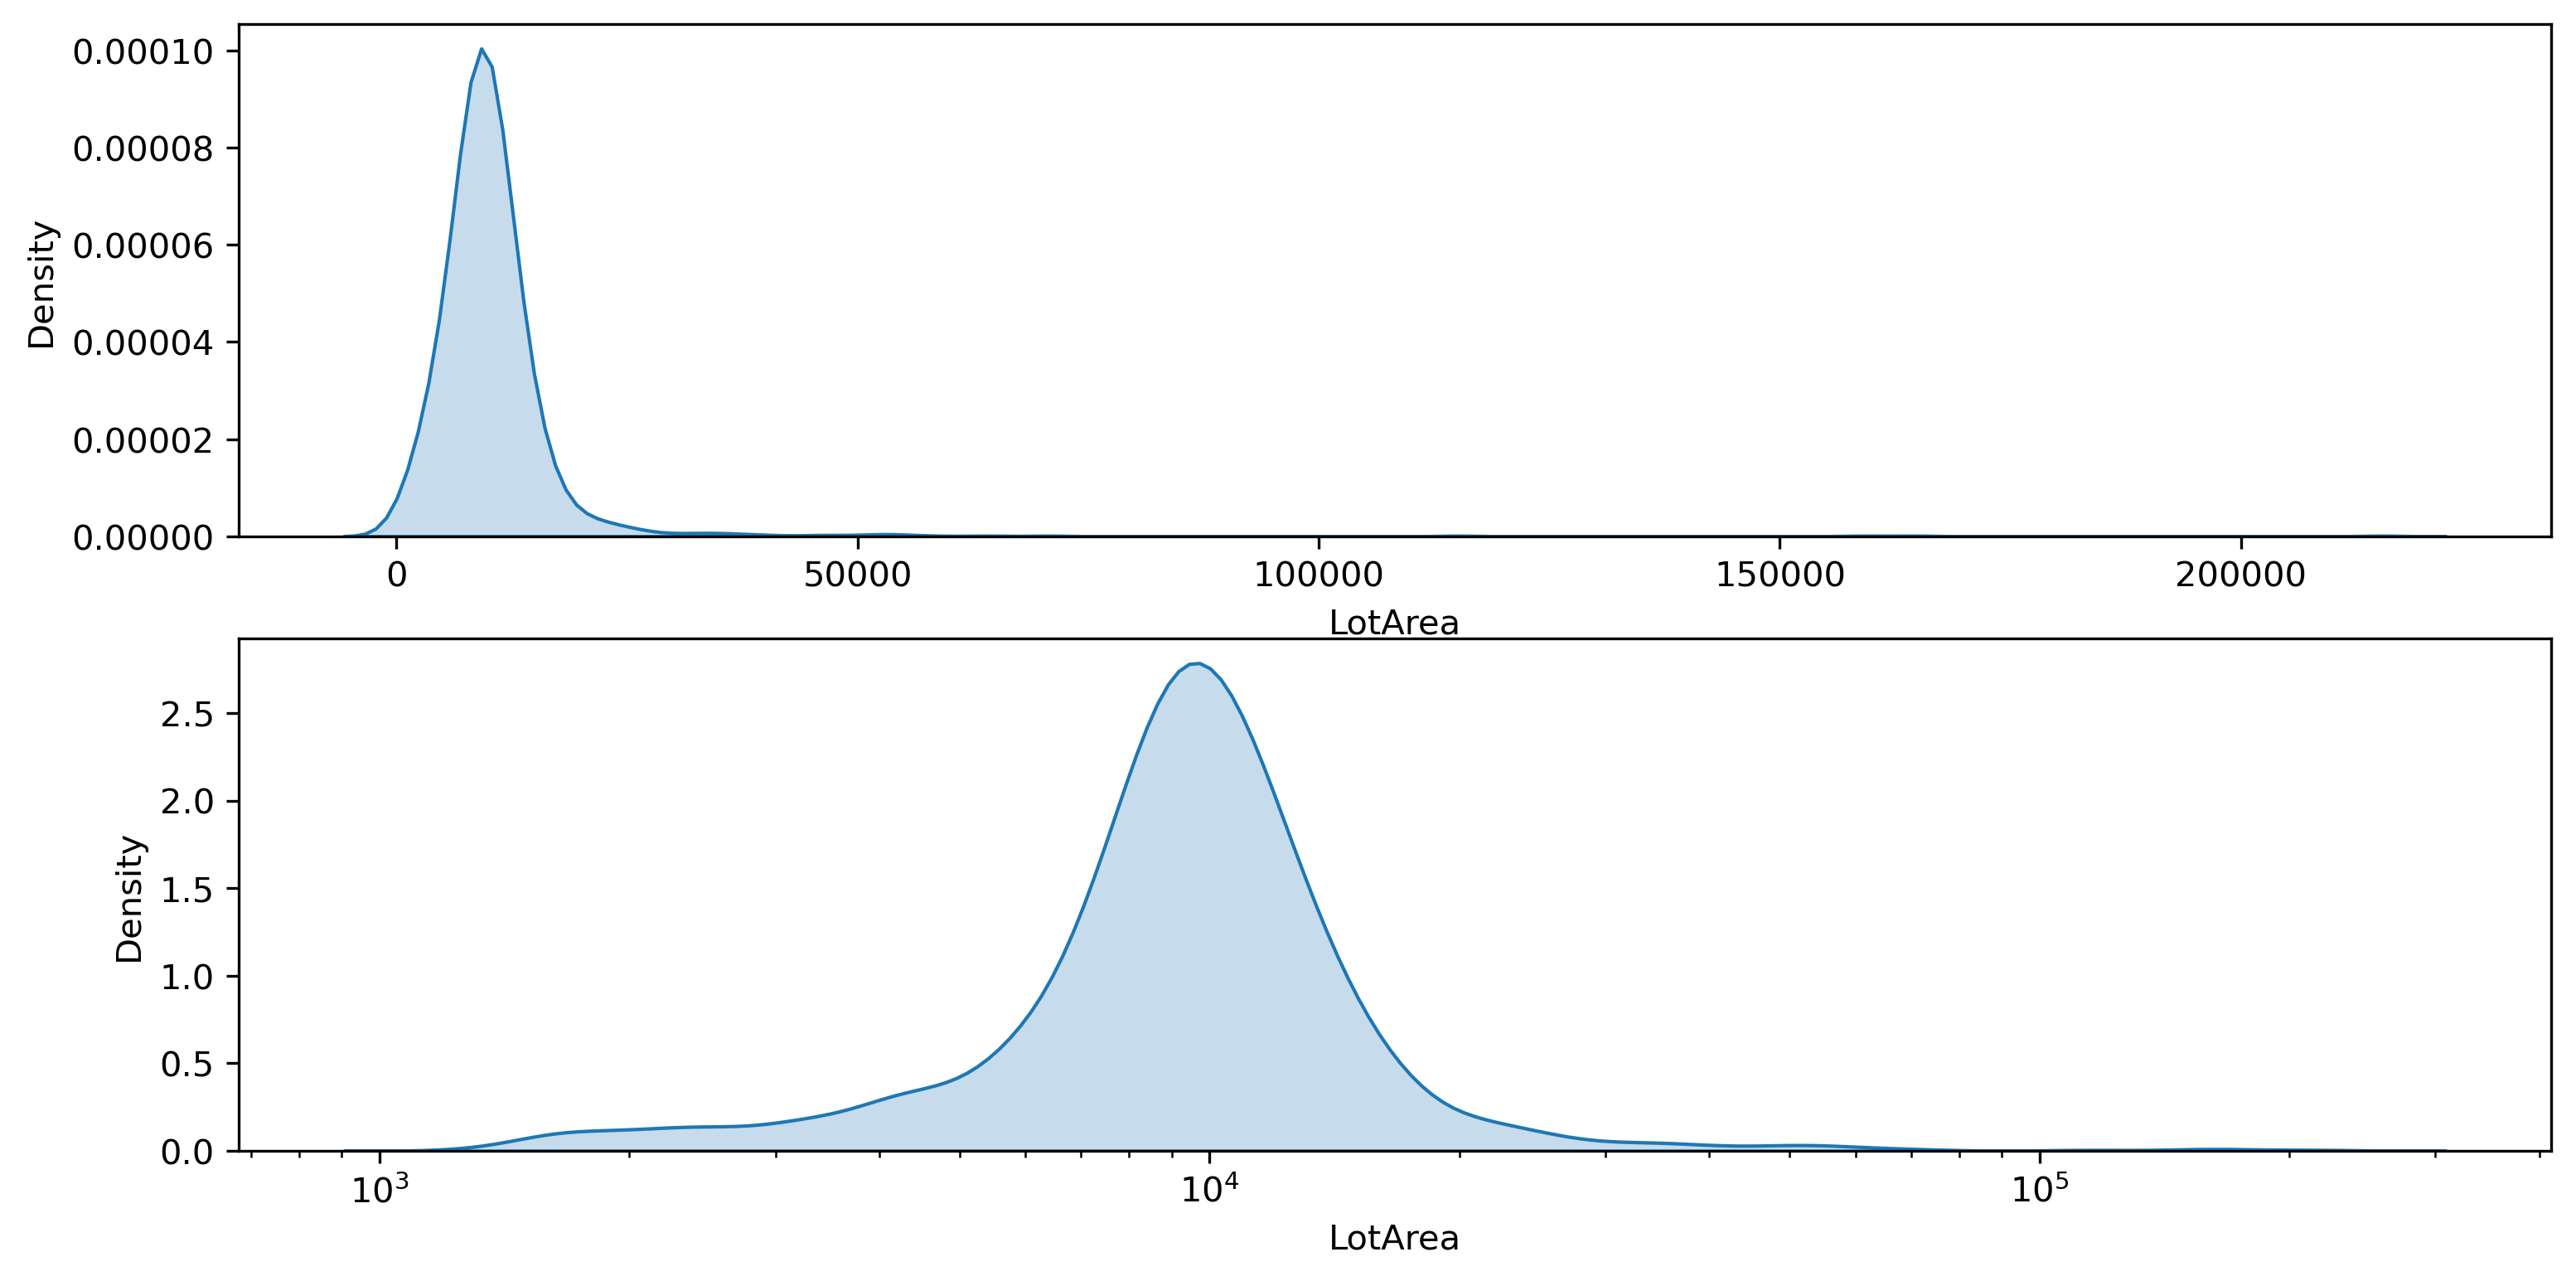

In [33]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[12,6],dpi=300)

sns.kdeplot(x=data['LotArea'],shade=True,ax=axes[0])
sns.kdeplot(x=data['LotArea'],shade=True,ax=axes[1],log_scale=True)
plt.show()

1.6651092223153954